# Support Vector Machines (SVMs)

Resources for the mathematical derivation:

- [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine)
- [16. Learning: Support Vector Machines](https://www.youtube.com/watch?v=_PwhiWxHK8o)
- [Support Vector Machines: All you need to know!](https://www.youtube.com/watch?v=ny1iZ5A8ilA)

---

- SVMs can be used for regression as well as classification.
- Purpose: ***Does a hyperplane exist that can effectively separate classes?***
- They are part of a family of algorithms: *Maximum Margin Classifiers* => *Support Vector Classifiers* => *Support Vector Machines*

## Maximum Margin Classifiers

Find the line that separates classes in the way that maximizes the distance between it and the "supporting" observations.

<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/max_margin_classif.png">

## Support Vector Classifiers

Allow for a few misclassifications.

<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/svc.png">

## Support Vector Machines

A function that adds a new dimension to the data is called a `kernel`.
SVMs use `kernels` to project the data to a higher dimension, in order to use a hyperplane in this higher dimension to separate the data.

<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/svm_start.png">

After the addition of a new dimension, the data can be separated:

<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/svm_end.png">

## The `kernel` trick

If you start digging in the theory of SVMs, you'll soon see the expression `the kernel trick`. The above two plots show how data points can be transformed from one dimension into a higher dimension. Mathematically, the kernel trick actually avoids recomputing the points in a higher dimensional space, but still managing to find a non-linear boundary!


## Imports

> Note: Most likely you don't have the package `nltk` installed. You can install it with Python's package manager - `pip`:

```console
pip install nltk
```

In [205]:
%reset -f

In [206]:
import re
from collections import Counter


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

## Load data

Answer the following questions:
- What is a hyperplane in 1D?
- What is a hyperplane in 2D?
- What is a hyperplane in 3D?

In [207]:
# `pd.read_csv` won't always work outside the box. Sometimes, the data is encoded in a different format
# usually the fix is to set the "encoding" parameter to "latin-1" 
df_spam = pd.read_csv('https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/DATA/spam.csv', encoding='latin-1')
df_spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [208]:
df_spam = df_spam.rename(columns={'v1': 'classif', 'v2': 'email_body'})
df_spam

,classif,email_body,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Exploratory data analysis

In [209]:
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   classif     5572 non-null   object
 1   email_body  5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [210]:
df_spam.describe().T

,count,unique,top,freq
classif,5572,2,ham,4825
email_body,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [211]:
df_spam.isna().mean()

classif       0.000000
email_body    0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64

In [212]:
pd.concat([
    df_spam['classif'].value_counts(dropna=False),
    df_spam['classif'].value_counts(dropna=False, normalize=True),
], axis=1)

,count,proportion
classif,,
ham,4825,0.865937
spam,747,0.134063


<Axes: ylabel='Frequency'>

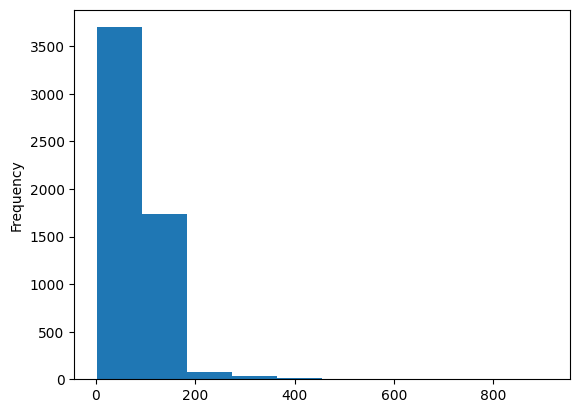

In [213]:
df_spam['email_body'].map(len).plot(kind='hist')

In [214]:
lens = df_spam["email_body"].map(len)
print(f'Minimum: {lens.min()}')
print(f'Mean: {lens.mean()}')
print(f'Maximum: {lens.max()}')

Minimum: 2
Mean: 80.11880832735105
Maximum: 910


## Preprocessing

In [215]:
df_spam['classif'] = df_spam['classif'].map({'ham': 0, 'spam': 1})
df_spam

,classif,email_body,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [216]:
df_spam = df_spam.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df_spam

,classif,email_body
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [217]:
# Take an email string and convert it to a list of stemmed words
def process_email(contents):
    ps = PorterStemmer()
    
    contents = contents.lower()
    contents = re.sub(r'<[^<>]+>', '', contents)
    contents = re.sub(r'[0-9]+', 'number', contents)
    contents = re.sub(r'(http|https)://[^\s]*', 'httpaddr', contents)
    contents = re.sub(r'[^\s]+@[^\s]+', 'emailaddr', contents)
    contents = re.sub(r'[$]+', 'dollar', contents)
    
    words = word_tokenize(contents)
    
    for i in range(len(words)):
        words[i] = ps.stem(words[i])
        
    words = [word for word in words if len(word) >= 1]
    
    return words


email = """> Anyone knows how much it costs to host a web portal?
>
Well, it depends on how many visitors you're expecting.add()
This can be anywhere from less than 10 bucks a month to a couple of $100.
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2
if youre running something big...

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com

"""

process_email(email)

['>',
 'anyon',
 'know',
 'how',
 'much',
 'it',
 'cost',
 'to',
 'host',
 'a',
 'web',
 'portal',
 '?',
 '>',
 'well',
 ',',
 'it',
 'depend',
 'on',
 'how',
 'mani',
 'visitor',
 'you',
 "'re",
 'expecting.add',
 '(',
 ')',
 'thi',
 'can',
 'be',
 'anywher',
 'from',
 'less',
 'than',
 'number',
 'buck',
 'a',
 'month',
 'to',
 'a',
 'coupl',
 'of',
 'dollarnumb',
 '.',
 'you',
 'should',
 'checkout',
 'httpaddr',
 'or',
 'perhap',
 'amazon',
 'ecnumb',
 'if',
 'your',
 'run',
 'someth',
 'big',
 '...',
 'to',
 'unsubscrib',
 'yourself',
 'from',
 'thi',
 'mail',
 'list',
 ',',
 'send',
 'an',
 'email',
 'to',
 ':',
 'emailaddr']

In [218]:
# Take a list of emails and get a dictionary of the most common words
def get_vocabulary(emails, vocab_length):
    frequencies = Counter([word for email in map(process_email, emails) for word in email])
    vocabulary = dict(enumerate([token for token, _ in frequencies.most_common()[:vocab_length]]))
    return vocabulary

get_vocabulary(df_spam['email_body'], 2000)

{0: '.',
 1: 'i',
 2: 'number',
 3: 'to',
 4: 'you',
 5: ',',
 6: '?',
 7: 'a',
 8: '!',
 9: 'the',
 10: '...',
 11: 'u',
 12: 'and',
 13: 'it',
 14: '&',
 15: 'is',
 16: 'in',
 17: 'me',
 18: ';',
 19: 'my',
 20: ':',
 21: 'for',
 22: 'your',
 23: '..',
 24: 'call',
 25: 'have',
 26: 'do',
 27: 'of',
 28: 'that',
 29: 'on',
 30: ')',
 31: "'s",
 32: 'now',
 33: 'are',
 34: 'so',
 35: 'go',
 36: 'get',
 37: 'not',
 38: 'but',
 39: 'be',
 40: 'or',
 41: 'can',
 42: 'at',
 43: 'we',
 44: "'m",
 45: 'will',
 46: 'if',
 47: 'ur',
 48: 'with',
 49: 'just',
 50: "n't",
 51: 'no',
 52: 'thi',
 53: 'how',
 54: 'gt',
 55: 'lt',
 56: '*',
 57: 'up',
 58: 'what',
 59: 'come',
 60: 'when',
 61: "''",
 62: '#',
 63: 'from',
 64: 'free',
 65: 'know',
 66: 'all',
 67: 'out',
 68: 'like',
 69: 'love',
 70: 'ok',
 71: 'got',
 72: 'time',
 73: 'wa',
 74: 'want',
 75: 'good',
 76: 'day',
 77: 'then',
 78: 'å£number',
 79: "'ll",
 80: 'there',
 81: '-',
 82: 'he',
 83: 'text',
 84: 'am',
 85: 'onli',
 86:

In [219]:
# Get the indices of vocab words used in a given email
def get_indices(email, vocabulary):
    reverse_lookup = dict(zip(vocabulary.values(), vocabulary.keys()))
    word_indices = set()
    
    for word in email:
        if word in vocabulary.values():
            word_indices.add(reverse_lookup.get(word, None))
    
    return word_indices


get_indices(process_email(email), get_vocabulary(df_spam['email_body'], 2000))

{0,
 2,
 3,
 4,
 5,
 6,
 7,
 10,
 13,
 20,
 22,
 27,
 29,
 30,
 39,
 40,
 41,
 46,
 52,
 53,
 63,
 65,
 86,
 132,
 142,
 143,
 152,
 164,
 177,
 224,
 261,
 322,
 346,
 355,
 369,
 414,
 463,
 517,
 554,
 591,
 609,
 612,
 628,
 657,
 817,
 891,
 986,
 1056,
 1095,
 1226}

In [220]:
def get_feature_vector(word_indices, vocab_length):
    feature_vec = np.zeros(vocab_length) - 1
    
    for i in word_indices:
        feature_vec[i] = 1
        
    return feature_vec

test_indices = get_indices(process_email(email), get_vocabulary(df_spam['email_body'], 2000))
get_feature_vector(test_indices, 2000)

array([ 1., -1.,  1., ..., -1., -1., -1.])

In [221]:
vocab_length = 2000

vocabulary = get_vocabulary(df_spam['email_body'], vocab_length)

emails = df_spam['email_body'].apply(lambda email: process_email(email))
emails

0       [go, until, jurong, point, ,, crazi, .., avail...
1                  [ok, lar, ..., joke, wif, u, oni, ...]
2       [free, entri, in, number, a, wkli, comp, to, w...
3       [u, dun, say, so, earli, hor, ..., u, c, alrea...
4       [nah, i, do, n't, think, he, goe, to, usf, ,, ...
                              ...                        
5567    [thi, is, the, numbernd, time, we, have, tri, ...
5568         [will, ì_, b, go, to, esplanad, fr, home, ?]
5569    [piti, ,, *, wa, in, mood, for, that, ., so, ....
5570    [the, guy, did, some, bitch, but, i, act, like...
5571                    [rofl, ., it, true, to, it, name]
Name: email_body, Length: 5572, dtype: object

In [222]:
y = df_spam['classif']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: classif, Length: 5572, dtype: int64

In [223]:
X = list(map(lambda x: get_feature_vector(get_indices(x, vocabulary), vocab_length), emails))
X = pd.DataFrame(np.array(X).astype(np.int16))
X

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,1,-1,1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,1,-1,1,-1,-1,1,-1,-1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5568,-1,-1,-1,1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5569,1,-1,-1,-1,-1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5570,-1,1,-1,1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## Modelling

In [225]:
df_results = pd.DataFrame(
    columns=['experiment', 'accuracy', 'precision', 'recall', 'f1-score']
)
df_results

,experiment,accuracy,precision,recall,f1-score


### Random

In [226]:
y_pred = np.random.choice(y_test, y_test.shape[0])
print(classification_report(y_test, y_pred))
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['random'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)]
})], ignore_index=True)
df_results

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       958
           1       0.15      0.15      0.15       157

    accuracy                           0.76      1115
   macro avg       0.51      0.51      0.51      1115
weighted avg       0.76      0.76      0.76      1115



,experiment,accuracy,precision,recall,f1-score
0,random,0.759641,0.150943,0.152866,0.151899


### Most common

In [227]:
y_pred = np.zeros_like(y_test)
print(classification_report(y_test, y_pred))
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['most_frequent'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)]
})], ignore_index=True)
df_results

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       958
           1       0.00      0.00      0.00       157

    accuracy                           0.86      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.74      0.86      0.79      1115



/home/work/Dev/private-ml/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/Dev/private-ml/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/work/Dev/private-ml/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

,experiment,accuracy,precision,recall,f1-score
0,random,0.759641,0.150943,0.152866,0.151899
1,most_frequent,0.859193,0.000000,0.000000,0.000000


### KNN

In [228]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test.to_numpy())
print(classification_report(y_test, y_pred))
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['knn'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)]
})], ignore_index=True)
df_results

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       958
           1       1.00      0.57      0.73       157

    accuracy                           0.94      1115
   macro avg       0.97      0.79      0.85      1115
weighted avg       0.94      0.94      0.93      1115



,experiment,accuracy,precision,recall,f1-score
0,random,0.759641,0.150943,0.152866,0.151899
1,most_frequent,0.859193,0.000000,0.000000,0.000000
2,knn,0.939910,1.000000,0.573248,0.728745


### Logistic regression

In [229]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['log_reg'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)]
})], ignore_index=True)
df_results

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       958
           1       0.98      0.92      0.95       157

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



/home/work/Dev/private-ml/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,experiment,accuracy,precision,recall,f1-score
0,random,0.759641,0.150943,0.152866,0.151899
1,most_frequent,0.859193,0.000000,0.000000,0.000000
2,knn,0.939910,1.000000,0.573248,0.728745
3,log_reg,0.986547,0.979730,0.923567,0.950820


### Support Vector Classifier

In [230]:
model = SVC()
model.fit(X_train, y_train)

SVC()

## Model evaluation

Answer the following questions:
- What is a confusion matrix?
- What is accuracy?
- What is accuracy in terms of the confusion matrix?
- When should accuracy be used?
- When shouldn't accuracy be used?
- What is precision?
- What is recall?
- What is the f1-score?

In [231]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [232]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       958
           1       1.00      0.91      0.95       157

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [233]:
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['svc'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)]
})], ignore_index=True)
df_results

,experiment,accuracy,precision,recall,f1-score
0,random,0.759641,0.150943,0.152866,0.151899
1,most_frequent,0.859193,0.000000,0.000000,0.000000
2,knn,0.939910,1.000000,0.573248,0.728745
3,log_reg,0.986547,0.979730,0.923567,0.950820
4,svc,0.987444,1.000000,0.910828,0.953333


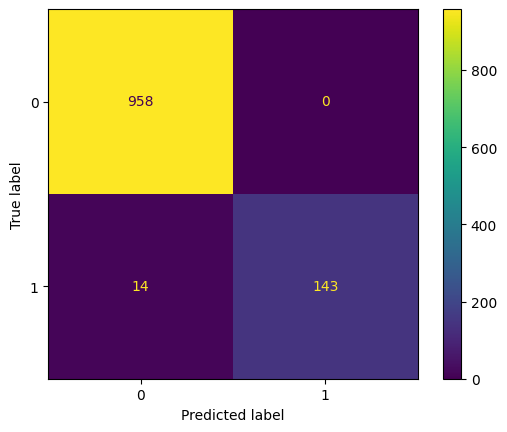

In [234]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

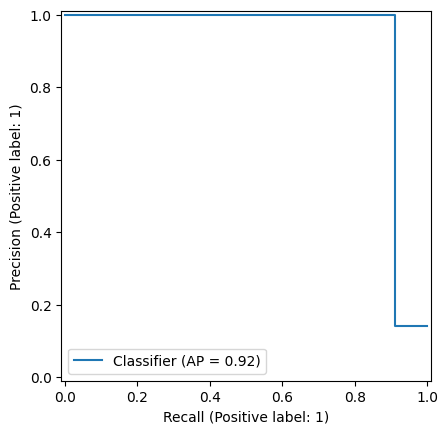

In [235]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.show()

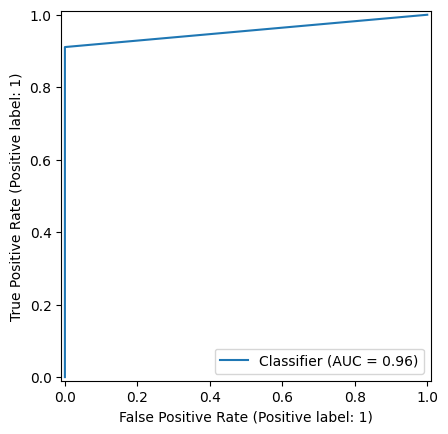

In [236]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

In [237]:
df_results

,experiment,accuracy,precision,recall,f1-score
0,random,0.759641,0.150943,0.152866,0.151899
1,most_frequent,0.859193,0.000000,0.000000,0.000000
2,knn,0.939910,1.000000,0.573248,0.728745
3,log_reg,0.986547,0.979730,0.923567,0.950820
4,svc,0.987444,1.000000,0.910828,0.953333
